<a href="https://colab.research.google.com/github/Sheraz55/Deep-learning-course-practice/blob/main/C%26D_using_pretrainconvent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [7]:
base_dir = '/content/drive/MyDrive/Catsvsdogs1'
train_dir = '/content/drive/MyDrive/Catsvsdogs1/train'
validation_dir = '/content/drive/MyDrive/Catsvsdogs1/validation'
test_dir = "/content/drive/MyDrive/Catsvsdogs1/test"
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [8]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [9]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
  directory,
  target_size=(150, 150),
  batch_size=batch_size,
  class_mode='binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

In [12]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [23]:
from keras import models
import tensorflow as tf

from keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 10ms/step - loss: 0.7147 - acc: 0.7590 - val_loss: 0.3240 - val_acc: 0.8550
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3503 - acc: 0.8485 - val_loss: 0.2887 - val_acc: 0.8820
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3030 - acc: 0.8755 - val_loss: 0.2728 - val_acc: 0.8890
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2551 - acc: 0.8965 - val_loss: 0.2403 - val_acc: 0.9020
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2068 - acc: 0.9185 - val_loss: 0.2819 - val_acc: 0.9020
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.1983 - acc: 0.9235 - val_loss: 0.2864 - val_acc: 0.9020
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.1712 - acc: 0.9320 - val_loss: 0.2986 - val_acc: 0.8910
Epoch 8/30
100/100 [==============================] - 1s 6ms/step - loss: 0

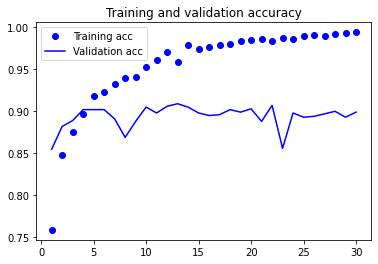

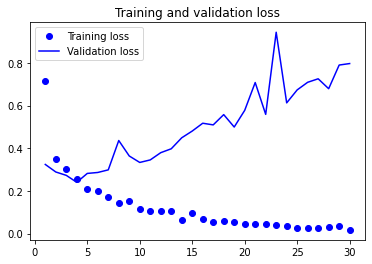

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
